In [1]:
# 数值计算
import numpy as np

# 绘图
import matplotlib.pyplot as plt
import seaborn as sns

#网站解析
import requests, lxml
from bs4 import BeautifulSoup

#自定义模块
import package.web as web

单个课程课评长度直方图

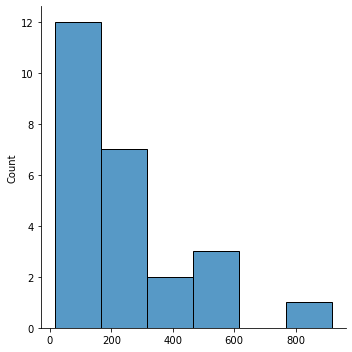

In [2]:
url = "https://icourse.club/course/14351/"

comments = web.GetComment(url)

# 评课长度分布直方图
LengthDistribution = list(map(len,comments))
sns.displot(LengthDistribution)
plt.show()

/Users/royalty/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/royalty/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/royalty/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/User

<AxesSubplot:title={'center':'seaborn: statistical data visualization'}, ylabel='Density'>

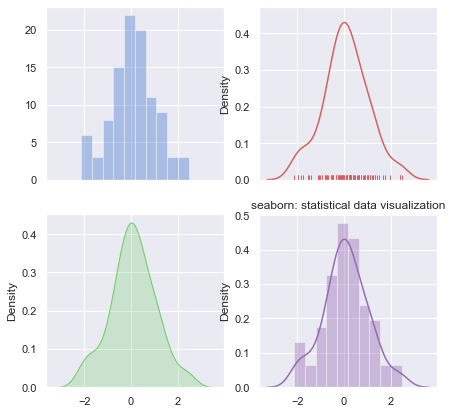

In [162]:
sns.set( palette="muted", color_codes=True)  
 
rs = np.random.RandomState(10)  
d = rs.normal(size=100)  
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)  
 
plt.title('seaborn: statistical data visualization')
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])  
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])  
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])  
sns.distplot(d, color="m", ax=axes[1, 1])  